# Load Packages

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pymysql.cursors
import pandas as pd
import numpy as np
import csv

# Load Data

In [2]:
pwd = "password"
user_name = "root"
host_loc = "localhost"
data_base = "database_name"

In [3]:
dbCON  = pymysql.connect(user=user_name, password=pwd, host=host_loc, database=data_base)

In [4]:
selector = dbCON.cursor()
selector.execute("SELECT * FROM transaction")
rows = selector.fetchall()
df = pd.DataFrame(data = np.array(rows))

In [5]:
dbCON.close() 

# Pre-Processing Data

In [6]:
df = pd.get_dummies(df, columns = [3])

In [7]:
del df[6], df[1], df[2], df[4]

In [8]:
df = df.convert_objects(convert_numeric = True).fillna(0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [9]:
df.head()

,0,5,3_,3_ATRID,3_DIGRID,3_DIGTRID,3_FTRID,3_FTRID,3_HTRID,3_PHTRID,3_PRTRID,3_SVTRID,3_TTRID
0,0,0.00,1,0,0,0,0,0,0,0,0,0,0
1,302,-8.34,0,0,0,0,1,0,0,0,0,0,0
2,302,-4.20,0,0,0,0,1,0,0,0,0,0,0
3,501,-10.00,0,0,0,0,0,0,0,0,0,0,1
4,302,-25.00,0,0,0,0,1,0,0,0,0,0,0


In [10]:
X = df.values

In [11]:
X

array([[  0.  ,   0.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
       [302.  ,  -8.34,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [302.  ,  -4.2 ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [302.  ,  -0.79,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [302.  ,  -4.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [302.  , -11.62,   0.  , ...,   0.  ,   0.  ,   0.  ]])

# Calculating the "Best" Value for `k`

In [12]:
kmeans_fit = [KMeans(n_clusters = iter_val).fit(X) for iter_val in range(5,50,5)]

In [13]:
scores = [(iter_val, model.score(X, model.predict(X))) for iter_val, model in enumerate(kmeans_fit)]

In [14]:
scoresDF = pd.DataFrame(scores)

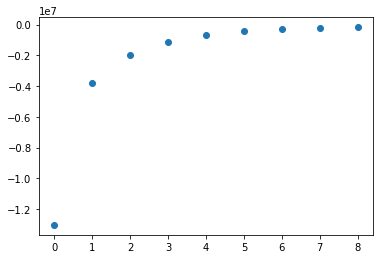

In [15]:
plt.scatter(x = scoresDF[0], y = scoresDF[1])

In [16]:
pred = KMeans(n_clusters = 2).fit_predict(X)